# Import Lib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Đọc tệp Excel
file_path = r"dataset.xlsx"
xl = pd.ExcelFile(file_path)

In [3]:
# Lấy tên các sheet và đọc dữ liệu từ các sheet (trừ sheet đầu tiên)
sheet_names = xl.sheet_names
sheet_names_except_first = sheet_names[1:]
dataframes = {sheet: xl.parse(sheet) for sheet in sheet_names_except_first}

In [4]:
# Khám phá cấu trúc của từng bảng dữ liệu
for sheet_name, df in dataframes.items():
    print(f"Data in {sheet_name}:")
    print("First 5 rows:\n", df.head())
    print("Data Types:\n", df.dtypes)
    print("Missing Values:\n", df.isnull().sum())
    print("\n")

Data in customer:
First 5 rows:
    customerid    DOB gender                 address       Website  \
0  0000000014  36268     Nữ  hoa khe quan thanh khe   KH0104|0345   
1  0000000034  35901    Nam                man thai   KH0104|0333   
2  0000000051  34319    Nam       que son quang nam   KH0104|0255   
3  0000000081  36472    Nam            truong chinh   KH0104|0293   
4  0000000098  34608    Nam                  cẩm lệ  KH0104|40580   

           job        industry  
0      student        computer  
1      student  health service  
2  blue collar       economics  
3      student       economics  
4  blue collar  health service  
Data Types:
 customerid    object
DOB            int64
gender        object
address       object
Website       object
job           object
industry      object
dtype: object
Missing Values:
 customerid       0
DOB              0
gender           0
address          1
Website        536
job              0
industry      1122
dtype: int64


Data in ticket:

# Làm sạch dữ liệu

In [5]:
# Xử lý giá trị bị thiếu trong bảng 'customer'
dataframes['customer']['address'].fillna('Unknown', inplace=True)
dataframes['customer']['industry'].fillna('Not Specified', inplace=True)
dataframes['customer']['Website'].fillna('No Website', inplace=True)

# Xử lý giá trị bị thiếu trong bảng 'film'
for column in ['director', 'cast', 'country', 'rating']:
    dataframes['film'][column].fillna('Unknown', inplace=True)

In [6]:
# Hiển thị dữ liệu sau khi làm sạch
cleaned_customer_df = dataframes['customer'].head()
cleaned_ticket_df = dataframes['ticket'].head()
cleaned_film_df = dataframes['film'].head()

print("Cleaned Data - Customer:\n", cleaned_customer_df)

Cleaned Data - Customer:
    customerid    DOB gender                 address       Website  \
0  0000000014  36268     Nữ  hoa khe quan thanh khe   KH0104|0345   
1  0000000034  35901    Nam                man thai   KH0104|0333   
2  0000000051  34319    Nam       que son quang nam   KH0104|0255   
3  0000000081  36472    Nam            truong chinh   KH0104|0293   
4  0000000098  34608    Nam                  cẩm lệ  KH0104|40580   

           job        industry  
0      student        computer  
1      student  health service  
2  blue collar       economics  
3      student       economics  
4  blue collar  health service  


In [7]:
print("Cleaned Data - Ticket:\n", cleaned_ticket_df)

Cleaned Data - Ticket:
             orderid cashier            saledate    total  customerid  \
0  10006052019B0225  emp002 2019-05-06 16:40:43  90000.0  0000000014   
1  10006052019B0225  emp002 2019-05-06 16:40:43  90000.0  0000000014   
2  10022052019B0167  emp011 2019-05-22 20:30:28  90000.0  0000000034   
3  10022052019B0167  emp011 2019-05-22 20:30:28  90000.0  0000000034   
4  10130052019B0141  emp005 2019-05-30 19:28:44  90000.0  0000000034   

   ticketcode       date      time slot  room  \
0    20074925 2019-05-06  18:15:00  G04     3   
1    20074924 2019-05-06  18:15:00  G03     3   
2    20097042 2019-05-22  20:45:00  E04     2   
3    20097041 2019-05-22  20:45:00  E03     2   
4    20106761 2019-05-30  19:30:00  F04     1   

                                      film slot type ticket type  \
0                        AVENGERS: HỒI KẾT       ĐƠN  Thành viên   
1                        AVENGERS: HỒI KẾT       ĐƠN  Thành viên   
2  JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18)  

In [8]:
print("Cleaned Data - Film:\n", cleaned_film_df)

Cleaned Data - Film:
   show_id                           title            director  \
0     s27             X-Men: Dark Phoenix       Simon Kinberg   
1    s165       The Kid Who Would Be King         Joe Cornish   
2    s194  Disney My Music Story: Perfume  Kentaro Takayanagi   
3    s222  Disney My Music Story: Yoshiki  Kentaro Takayanagi   
4    s241           Great Shark Chow Down       Mark Woodward   

                                                cast  \
0  James McAvoy, Michael Fassbender, Jennifer Law...   
1  Louis Ashbourne Serkis, Tom Taylor, Rebecca Fe...   
2                        a-chan , KASHIYUKA , NOCCHi   
3                                            YOSHIKI   
4                                       Dan Nachtrab   

                         country  release_year   rating duration  \
0          United States, Canada          2019    PG-13  115 min   
1  United Kingdom, United States          2019       PG  121 min   
2                        Unknown          2019

## Check outlier

In [9]:
def check_and_visualize_outliers(df, column):
    # Sử dụng mô tả thống kê
    print(df[column].describe())
    
    # Kiểm tra outliers bằng biểu đồ boxplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [10]:
df_customer = dataframes['customer'] 
df_ticket = dataframes['ticket']
df_film = dataframes['film']

In [11]:
df_customer

,customerid,DOB,gender,address,Website,job,industry
0,0000000014,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service
...,...,...,...,...,...,...,...
4474,KH9855766,34885,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",No Website,specialist,finance
4475,KH9958204,36892,Nữ,"Phước Mỹ, ĐN",No Website,teenager,Not Specified
4476,WEBS00000043900,32311,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction
4477,WEBS00000044909,35316,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance


In [12]:
df_ticket

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket type,ticket price,popcorn
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074925,2019-05-06,18:15:00,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074924,2019-05-06,18:15:00,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097042,2019-05-22,20:45:00,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
3,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097041,2019-05-22,20:45:00,E03,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
4,10130052019B0141,emp005,2019-05-30 19:28:44,90000.0,0000000034,20106761,2019-05-30,19:30:00,F04,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107072,2019-05-30,21:35:00,B10,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35470,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107071,2019-05-30,21:35:00,B09,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35471,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107069,2019-05-30,21:35:00,B07,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35472,12508052019B0036,emp007,2019-05-08 19:26:47,90000.0,WEBS00000046015,20077797,2019-05-08,19:15:00,C14,4,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không


count    3.537800e+04
mean     1.627623e+05
std      1.503604e+05
min      0.000000e+00
25%      9.000000e+04
50%      9.000000e+04
75%      1.800000e+05
max      1.935000e+06
Name: total, dtype: float64


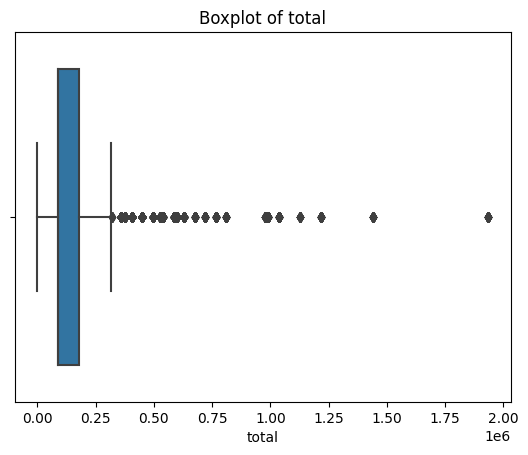

In [13]:
check_and_visualize_outliers(df_ticket, 'total')

Không xử lý outlier ở cột total, vì có thể xuất hiện những lần mua vé số lượng lớn dẫn đến total cao

CTA
- Thống kê mô tả dữ liệu
- Data Transformation 

In [21]:
df_ticket.describe(include='all')

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket type,ticket price,popcorn
count,35378,35474,35378,3.537800e+04,35474,3.547400e+04,35474,35474,35474,35474.000000,35474,35474,35474,35474.000000,35378
unique,14598,16,NaN,NaN,4479,NaN,NaN,159,190,NaN,19,2,1,NaN,2
top,10026052019B0285,emp011,NaN,NaN,KH6166700,NaN,NaN,19:15:00,G09,NaN,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,NaN,Không
freq,43,5894,NaN,NaN,10132,NaN,NaN,1583,597,NaN,9630,34063,35474,NaN,35287
mean,NaN,NaN,2019-05-16 21:37:31.279156480,1.627623e+05,NaN,2.008919e+07,2019-05-16 05:55:52.787957248,NaN,NaN,2.572645,NaN,NaN,NaN,47519.591814,NaN
min,NaN,NaN,2019-05-01 07:05:53,0.000000e+00,NaN,2.006840e+07,2019-05-01 00:00:00,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,2019-05-09 20:04:42.249999872,9.000000e+04,NaN,2.007942e+07,2019-05-09 00:00:00,NaN,NaN,2.000000,NaN,NaN,NaN,45000.000000,NaN
50%,NaN,NaN,2019-05-16 12:25:40,9.000000e+04,NaN,2.008918e+07,2019-05-16 00:00:00,NaN,NaN,3.000000,NaN,NaN,NaN,45000.000000,NaN
75%,NaN,NaN,2019-05-24 17:09:30,1.800000e+05,NaN,2.009896e+07,2019-05-24 00:00:00,NaN,NaN,4.000000,NaN,NaN,NaN,45000.000000,NaN
max,NaN,NaN,2019-05-31 23:05:18,1.935000e+06,NaN,2.010888e+07,2019-05-31 00:00:00,NaN,NaN,4.000000,NaN,NaN,NaN,160000.000000,NaN


In [22]:
df_customer.describe(include='all')

,customerid,DOB,gender,address,Website,job,industry
count,4479,4.479000e+03,4479,4479,4479,4479,4479
unique,4479,NaN,2,1263,3944,5,10
top,0000000014,NaN,Nữ,hải châu,No Website,student,Not Specified
freq,1,NaN,2405,312,536,1251,1122
mean,NaN,3.664930e+04,NaN,NaN,NaN,NaN,NaN
std,NaN,5.605061e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,2.346300e+04,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.440950e+04,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.555300e+04,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.652600e+04,NaN,NaN,NaN,NaN,NaN


In [121]:
import numpy as np

# Value counts for categorical columns
# For Ticket Data
for col in df_ticket.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts for {col} in Ticket Data:\n", df_ticket[col].value_counts())

# For Customer Data
for col in df_customer.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts for {col} in Customer Data:\n", df_customer[col].value_counts())


Value counts for orderid in Ticket Data:
 orderid
10026052019B0285    43
12511052019B0007    32
10015052019B0081    27
12521052019B0026    27
10017052019B0148    23
                    ..
10106052019B0121     1
10025052019B0287     1
10012052019B0213     1
10012052019B0335     1
10014052019B0114     1
Name: count, Length: 14598, dtype: int64

Value counts for cashier in Ticket Data:
 cashier
emp011     5894
emp006     5608
emp012     4190
emp014     3778
emp005     2622
emp008     2272
emp002     2232
emp010     2133
emp007     2041
emp004     1907
emp009      825
emp001      678
emp003      502
emp015      469
emp013      227
Website      96
Name: count, dtype: int64

Value counts for customerid in Ticket Data:
 customerid
KH6166700     10132
0000029127     7105
0001121703      507
KH3742976        54
0003004563       52
              ...  
0001023931        1
0001023923        1
0001165762        1
0001168337        1
0000027879        1
Name: count, Length: 4479, dtype: int64

Valu

In [132]:
df = df_ticket.merge(df_customer, how = 'inner', on = 'customerid')
df.to_excel('df_merge.xlsx',index=False)

In [173]:
df = pd.read_excel('df_merge.xlsx')

In [126]:
df['saledate'] = pd.to_datetime(df['saledate'])

# Grouping data by dáy to observe trends over time
df['Sales_Days'] = df['saledate'].dt.to_period('d')
sales_trends = df.groupby('Sales_Days').agg({'total': 'sum'}).reset_index()
sales_trends['Sales_Days'] = sales_trends['Sales_Days'].astype(str)
sales_trends

,Sales_Days,total
0,2019-05-01,224195000.0
1,2019-05-02,160245000.0
2,2019-05-03,15615000.0
3,2019-05-05,265920000.0
4,2019-05-06,161955000.0
5,2019-05-07,153765000.0
6,2019-05-08,180585000.0
7,2019-05-09,217650000.0
8,2019-05-10,240165000.0
9,2019-05-11,435375000.0


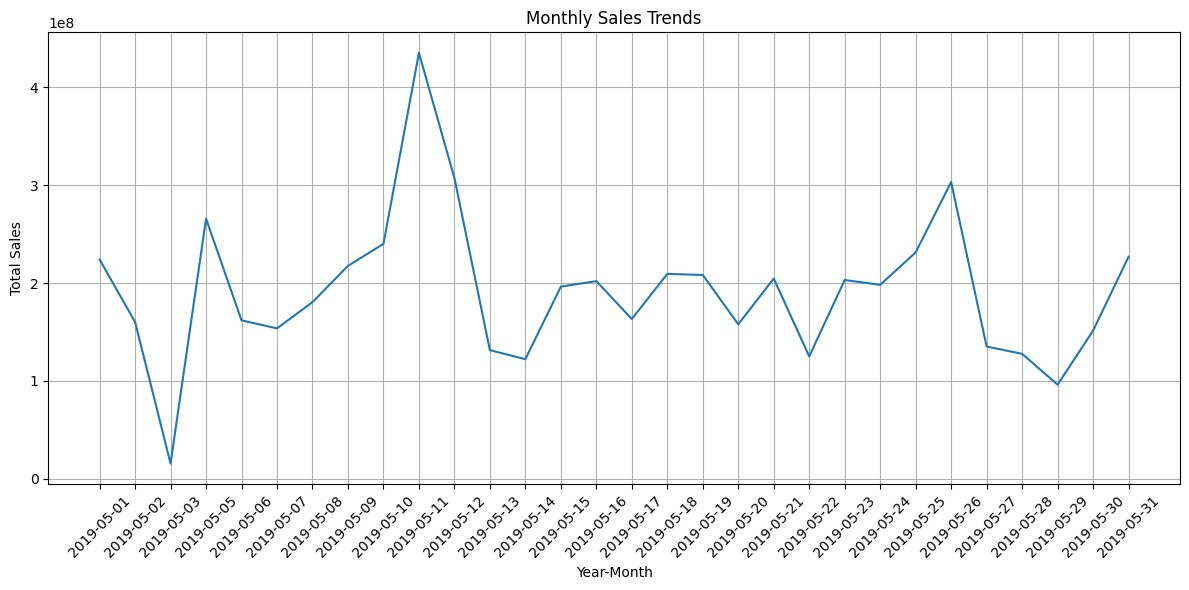

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Sales_Days', y='total')
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [174]:
from datetime import datetime, timedelta

reference_date = datetime(1899, 12, 30) 
def convert_to_datetime(x):
    try:
        return pd.to_datetime(reference_date + timedelta(days=int(x)))
    except (ValueError, TypeError):
        return pd.NaT  # Returns NaT (Not a Time) for invalid dates

df['DOB'] = df['DOB'].apply(convert_to_datetime)
df['DOB']

0       1999-04-18
1       1999-04-18
2       1998-04-16
3       1998-04-16
4       1998-04-16
           ...    
35469   1996-09-08
35470   1996-09-08
35471   1996-09-08
35472   2002-04-26
35473   2002-04-26
Name: DOB, Length: 35474, dtype: datetime64[ns]

In [175]:
#calculating age
try:
    df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365
except Exception as e:
    print(f"An error occurred: {e}")
    df['Age'] = None

In [182]:
df[['DOB', 'Age']].head(10)

,DOB,Age
0,1999-04-18,24.0
1,1999-04-18,24.0
2,1998-04-16,25.0
3,1998-04-16,25.0
4,1998-04-16,25.0
5,1998-04-16,25.0
6,1993-12-16,30.0
7,1993-12-16,30.0
8,1999-11-08,24.0
9,1999-11-08,24.0


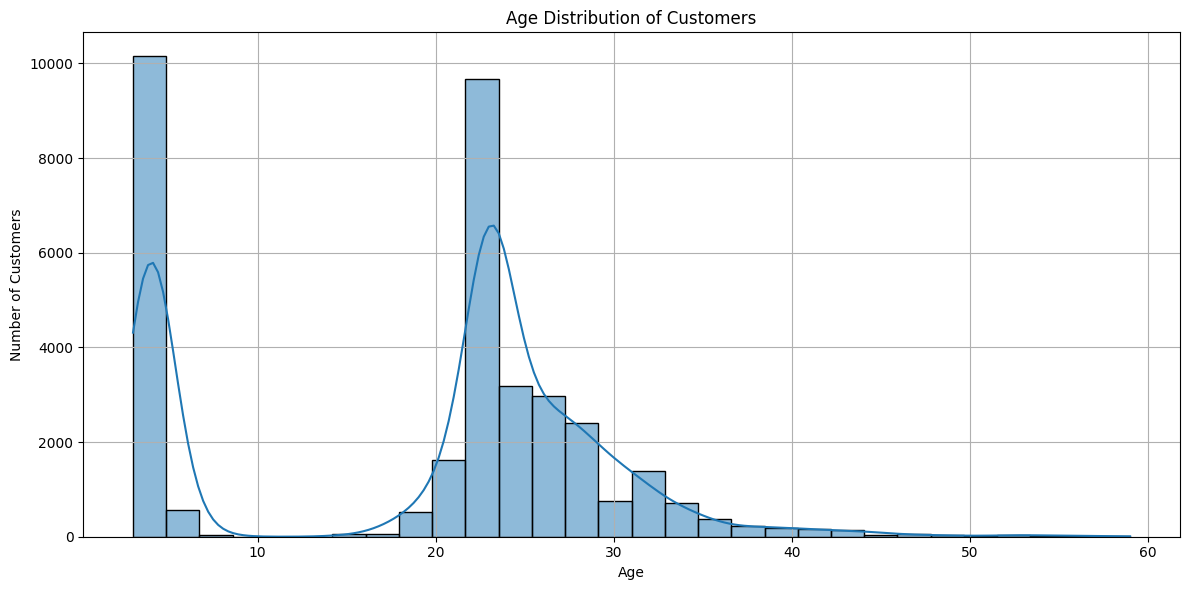

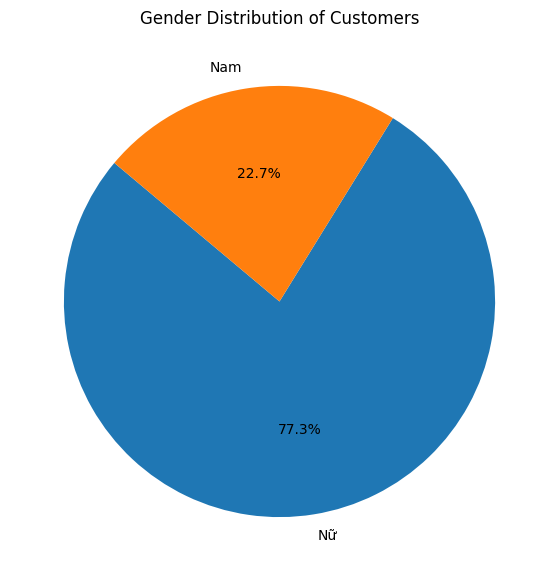

In [186]:
# Plotting age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Age']>0]['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting gender distribution
gender_distribution = df['gender'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Customers')
plt.show()
